prepared by Avi - Draft

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# reading csv file
athelete = pd.read_csv("Raw Data/athlete_events.csv")
country = pd.read_csv ("Raw Data/noc_regions.csv")


In [4]:
# Combine the data into a single DataFrame
df = pd.merge(athelete,country, how="left", on= "NOC")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


# Missing values: age, height and weight with Average values:
null values: Age -261642, Height - 210945, Weight- 208241, Medal, region, notes.

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

*As per the above code,its clear that "Age", "Height", "Weight" and "Medal" columns have missing values. But, missing values in "Medal" column is not the missing values but instead they do not acquire any medals and players didn't win any medal for the particular sport. Therefore, while imputing the values its recommended to impute values only to "Age", "Height" and "Weight" columns in the dataset.*

In [7]:
# DATA CLEANING 1
# finding age, height and weight with Average values:

avg_age = round(df['Age'].mean(),0)
avg_height = round(df['Height'].mean(),0)
avg_weight = round(df['Weight'].mean(),0)

print(avg_age, avg_height, avg_weight)

26.0 175.0 71.0


In [8]:
# DATA CLEANING 1a
# replacing age, height and weight with Average values:
df['Age'].fillna(avg_age, inplace=True)
df['Height'].fillna(avg_height, inplace=True)
df['Weight'].fillna(avg_weight, inplace=True)

In [9]:
# # DATA CLEANING 2
# Renaming City as Hosting City and region as Athlete Country
df = df.rename(columns={"City":"Hosting City", "region":"Athlete Country"})


In [10]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Hosting City,Sport,Event,Medal,Athlete Country,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,71.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
df.isnull().sum()

ID                      0
Name                    0
Sex                     0
Age                     0
Height                  0
Weight                  0
Team                    0
NOC                     0
Games                   0
Year                    0
Season                  0
Hosting City            0
Sport                   0
Event                   0
Medal              231333
Athlete Country       370
notes              266077
dtype: int64

### Top 10 Medal Winning Country

In [12]:
# grouping total meadals by top 10 countries

medal_count_bycountries = df.groupby("Athlete Country")["Medal"].count().nlargest(10)
medal_by_country =medal_count_bycountries.reset_index()
medal_by_country

,Athlete Country,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777
5,Italy,1637
6,Sweden,1536
7,Canada,1352
8,Australia,1349
9,Hungary,1135


In [13]:
countries = medal_by_country['Athlete Country']
medalCount = medal_by_country['Medal']

Text(0, 0.5, 'Medal Count')

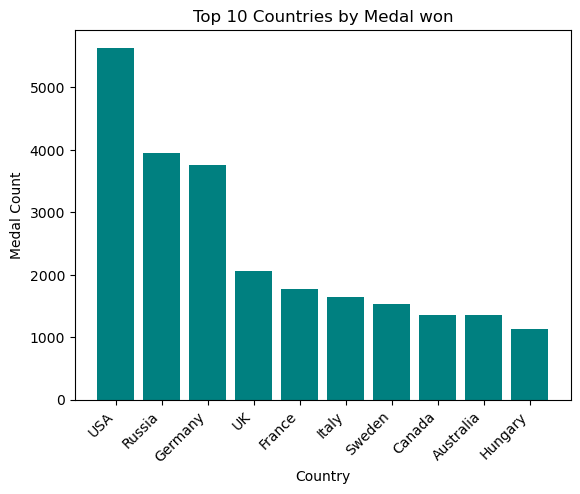

In [133]:
plt.bar(countries, medalCount, color = 'teal')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries by Medal won')
plt.xlabel('Country')
plt.ylabel('Medal Count')

Medal Type Won by Top 10 Countries

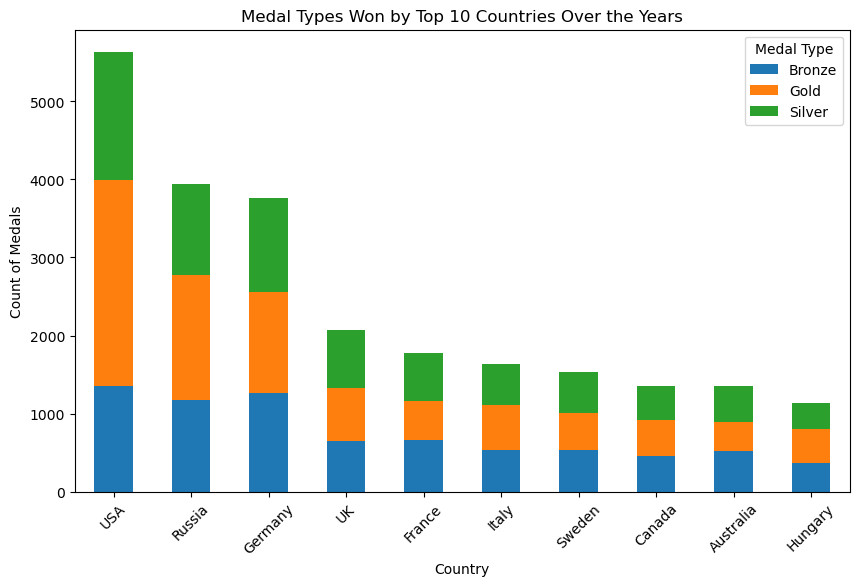

In [131]:

# Group the data by country and medal type to get the count of each medal type for each country
medaltype_by_country = df.groupby(['Athlete Country', 'Medal']).size().unstack(fill_value=0)
top10_country_by_medal = medaltype_by_country.loc[countries]

# Plot the stacked bar chart
ax = top10_country_by_medal.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Count of Medals')
ax.set_xlabel('Country')
ax.set_title('Medal Types Won by Top 10 Countries Over the Years')
plt.xticks(rotation=45)
plt.legend(title='Medal Type')

plt.show()

## Distribution of Physical Attributes of Athletes

(array([   85.,   198.,   263.,   365.,   393.,   924.,  1518.,  1996.,
         2908.,  3355.,  6453.,  8340., 11157.,  9197., 12486., 16564.,
        15656., 76576., 11345., 14710., 16929., 14594., 11199.,  7950.,
         6822.,  6368.,  4161.,  2515.,  3034.]),
 array([140., 142., 144., 146., 148., 150., 152., 154., 156., 158., 160.,
        162., 164., 166., 168., 170., 172., 174., 176., 178., 180., 182.,
        184., 186., 188., 190., 192., 194., 196., 198.]),
 <BarContainer object of 29 artists>)

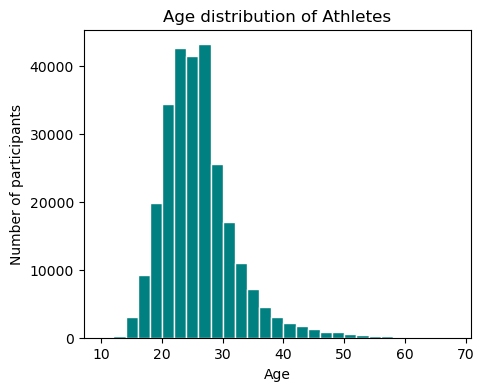

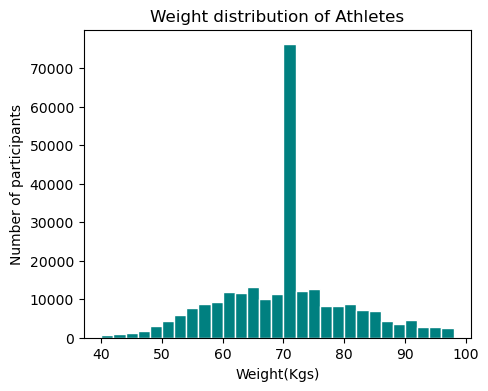

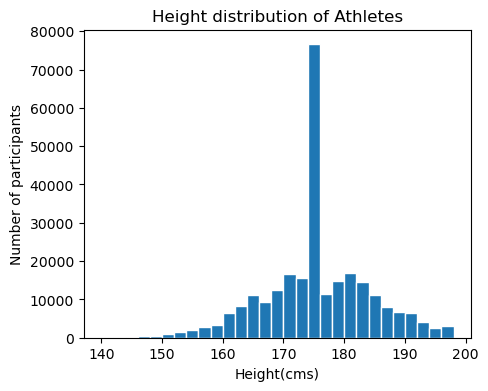

In [135]:
# Age Distribution of Participants
plt.figure(figsize=(5,4))
plt.title ("Age distribution of Athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(df['Age'], bins = np.arange(10,70,2), color = 'teal',edgecolor='white')

# Weight Distribution of Athletes:

plt.figure(figsize=(5,4))
plt.title ("Weight distribution of Athletes")
plt.xlabel('Weight(Kgs)')
plt.ylabel('Number of participants')
plt.hist(df['Weight'], bins = np.arange(40,100,2),color = 'teal', edgecolor='white')

# Height Distribution of Athlete:

plt.figure(figsize=(5,4))
plt.title ("Height distribution of Athletes")
plt.xlabel('Height(cms)')
plt.ylabel('Number of participants')
plt.hist(df['Height'], bins = np.arange(140,200,2),edgecolor='white')


## Correlation Analysis between Height, Weight, and Medal Achievement:

The correlation between weight and Height is 0.79


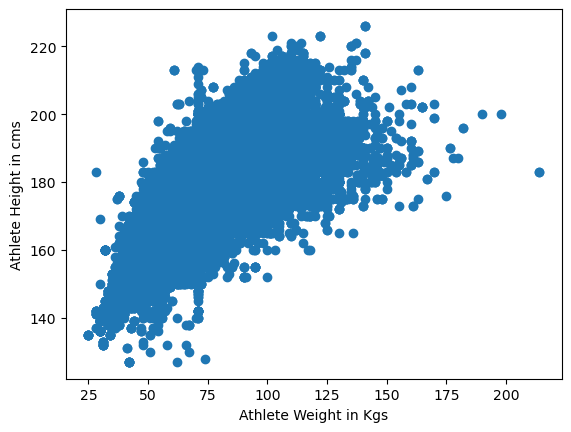

The correlation between weight & Age is 0.16


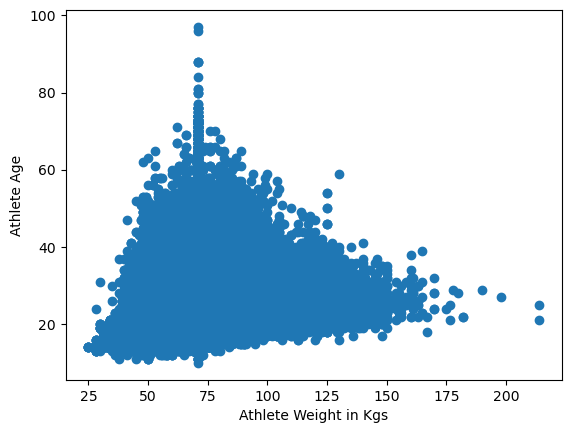

The correlation between age and height is 0.1


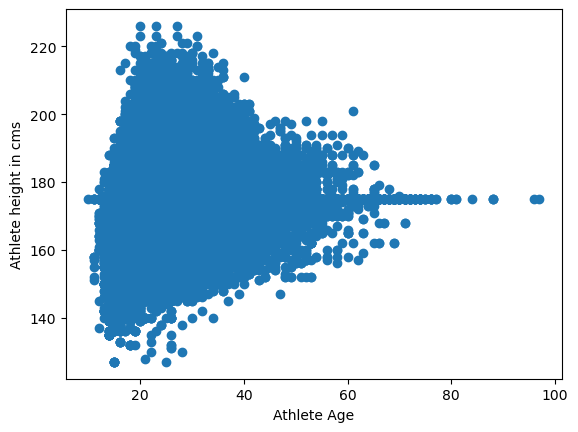

In [ ]:
# Correlation weight vs Height
age = df.iloc[:,3]
height = df.iloc[:,4]
weight = df.iloc[:,5]

# Correlation weight vs Height
plt.scatter(weight, height)
plt.xlabel('Athlete Weight in Kgs')
plt.ylabel('Athlete Height in cms')
correlation = st.pearsonr(weight, height)
print(f"The correlation between weight and Height is {round(correlation[0],2)}")
plt.show()

# Correlation Age vs weight
plt.scatter(weight, age)
plt.xlabel('Athlete Weight in Kgs')
plt.ylabel('Athlete Age')
correlation = st.pearsonr(weight, age)
print(f"The correlation between weight & Age is {round(correlation[0],2)}")
plt.show()

# Correlation Age vs Height

plt.scatter(age, height)
plt.xlabel('Athlete Age')
plt.ylabel('Athlete height in cms')
correlation = st.pearsonr(age, height)
print(f"The correlation between age and height is {round(correlation[0],2)}")
plt.show()

#### Among the three variables (age, weight, and height), the strongest relationship is observed between weight and height, with a correlation coefficient of 0.79, indicating a strong positive correlation.
#### Age shows relatively weaker correlations with weight (0.16) and height (0.1), suggesting that age alone may not be as influential in determining an athlete's weight or height compared to the relationship between weight and height.

Scatter Matrix

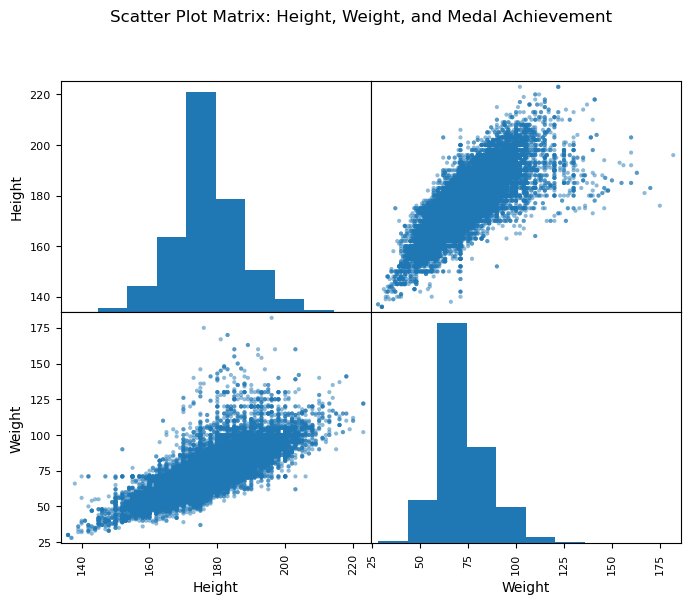

In [ ]:
# making copy of df and filtering athletes with medals
medalists = df.dropna(subset=['Medal']).copy()  

# Encode medal categories into numerical values
medal_mapping = {'Gold': 1, 'Silver': 2, 'Bronze': 3}
medalists.loc[:, 'Medal'] = medalists['Medal'].map(medal_mapping).fillna(0)

# Create a scatter plot matrix
from pandas.plotting import scatter_matrix

attributes = ['Height', 'Weight', 'Medal']
scatter_matrix(medalists[attributes], figsize=(8, 6))

plt.suptitle('Scatter Plot Matrix: Height, Weight, and Medal Achievement', y=1)
plt.show()

## Distribution of Physical Attributes of Athletes

In [ ]:
## Gender Distribution and Participation in games:
 
genderCounts = df.Sex.value_counts()
genderCounts

Sex
M    196594
F     74522
Name: count, dtype: int64

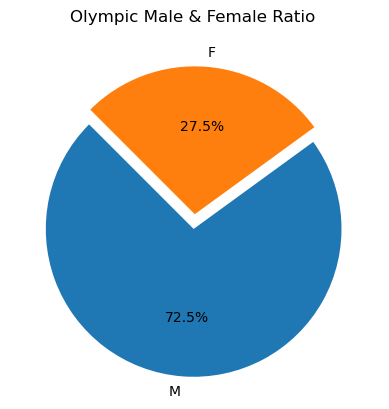

In [ ]:
plt.pie(genderCounts,labels = genderCounts.index, autopct = '%1.1f%%',startangle=135, explode=[0.1,0])
plt.title('Olympic Male & Female Ratio ')
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

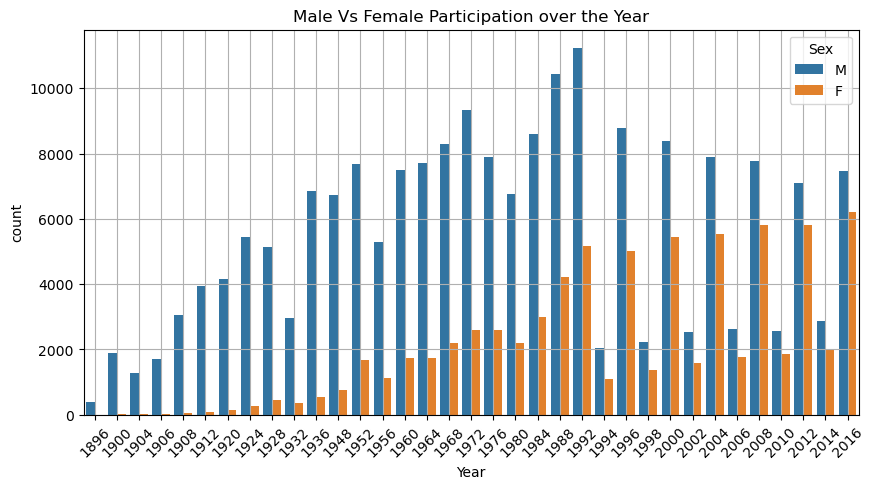

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', hue='Sex')
plt.xticks(rotation = 45)
plt.grid()
plt.title('Male Vs Female Participation over the Year')
plt.tight_layout

In [ ]:
# checking Medal Type counts
medal_type = df.Medal.value_counts()
medal_type

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [ ]:
# Creating Gender DF by Year, Sex and Medal count
gender_df = pd.DataFrame(df.groupby(['Year', 'Sex'])['Medal'].value_counts()).reset_index()
gender_df.head()

,Year,Sex,Medal,count
0,1896,M,Gold,62
1,1896,M,Silver,43
2,1896,M,Bronze,38
3,1900,F,Bronze,5
4,1900,F,Gold,4


#### Male VS Female Medal Won in Olympic Over the Years

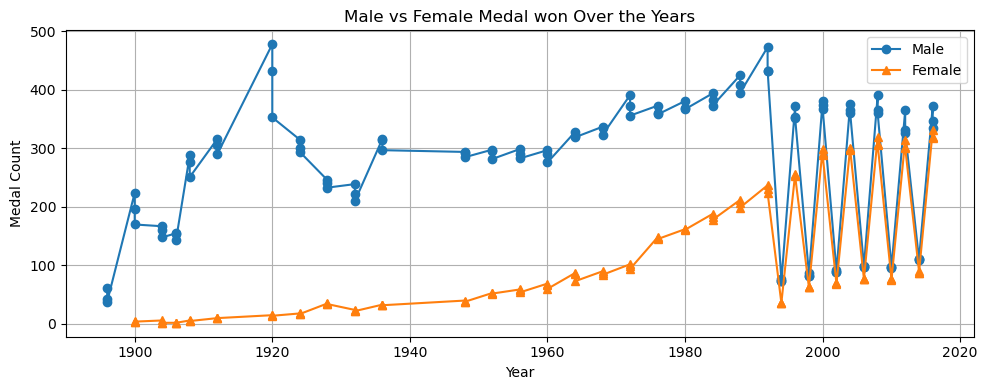

In [ ]:
male_count =gender_df[gender_df['Sex'] == 'M']
female_count = gender_df[gender_df['Sex']=='F']

# Create a plot for male vs female medal won over the years
plt.figure(figsize=(10, 4))
plt.plot(male_count['Year'], male_count['count'], marker='o', label='Male')
plt.plot(female_count['Year'], female_count['count'], marker='^', label='Female')
plt.title('Male vs Female Medal won Over the Years')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Distribution of Physical Attributes of Athletes

In [ ]:
## Gender Distribution and Participation in games:
 
genderCounts = df.Sex.value_counts()
genderCounts

Sex
M    196594
F     74522
Name: count, dtype: int64

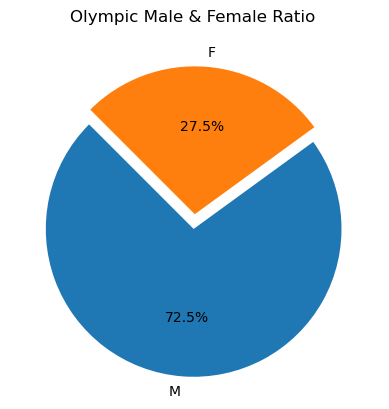

In [ ]:
plt.pie(genderCounts,labels = genderCounts.index, autopct = '%1.1f%%',startangle=135, explode=[0.1,0])
plt.title('Olympic Male & Female Ratio ')
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

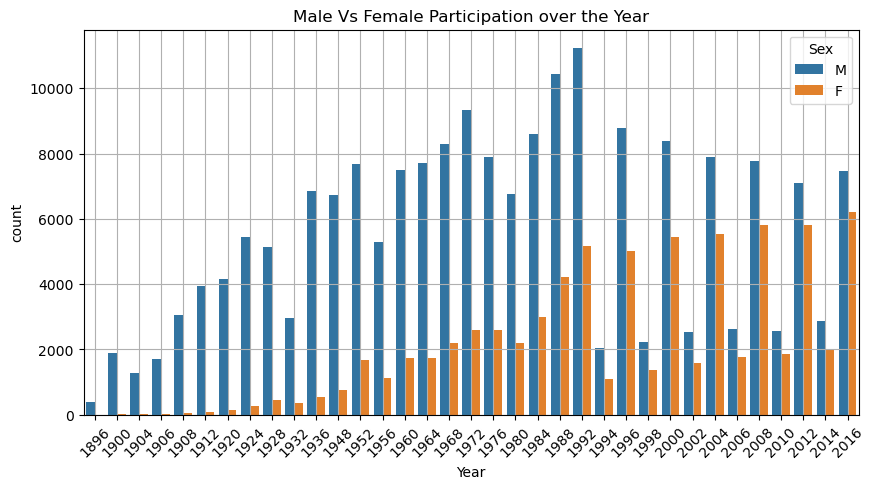

In [ ]:
import seaborn as sns

fig = plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Year', hue='Sex')
plt.xticks(rotation = 45)
plt.grid()
plt.title('Male Vs Female Participation over the Year')
plt.tight_layout

In [ ]:
# checking Medal Type counts
medal_type = df.Medal.value_counts()
medal_type

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [ ]:
# Creating Gender DF by Year, Sex and Medal count
gender_df = pd.DataFrame(df.groupby(['Year', 'Sex'])['Medal'].value_counts()).reset_index()
gender_df.head()

,Year,Sex,Medal,count
0,1896,M,Gold,62
1,1896,M,Silver,43
2,1896,M,Bronze,38
3,1900,F,Bronze,5
4,1900,F,Gold,4


#### Male VS Female Medal Won in Olympic Over the Years

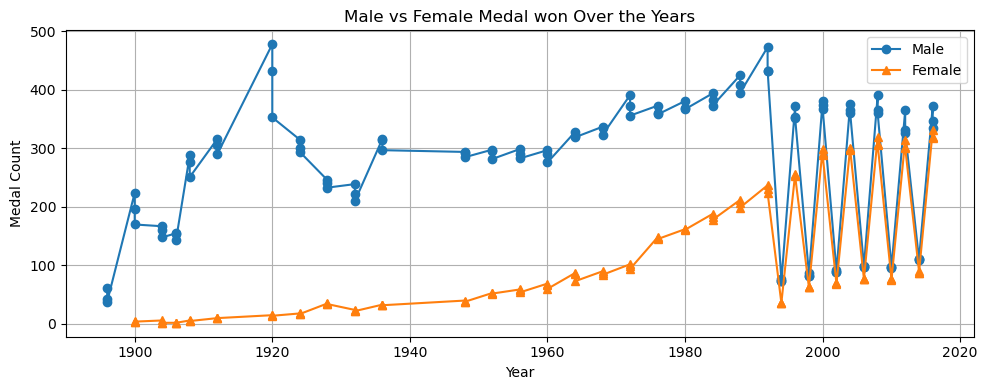

In [ ]:
male_count =gender_df[gender_df['Sex'] == 'M']
female_count = gender_df[gender_df['Sex']=='F']

# Create a plot for male vs female medal won over the years
plt.figure(figsize=(10, 4))
plt.plot(male_count['Year'], male_count['count'], marker='o', label='Male')
plt.plot(female_count['Year'], female_count['count'], marker='^', label='Female')
plt.title('Male vs Female Medal won Over the Years')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()